<font color="blue">To use this notebook on Google Colaboratory, you will need to make a copy of it. Go to **File** > **Save a Copy in Drive**. You can then use the new copy that will appear in the new tab.</font>

# Practice Section: Regression Analysis with Python

## Pre-requisites

In [ ]:
# Importing the required libraries
# ---
#
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

## Examples

#### <font color="blue">Example 1: Simple Linear Regression</font>

In [ ]:
# Example 1
# --- 
# Question: Create a linear regression model to predict the output y given the input x from the dataset below.
# ---
# Dataset url = http://bit.ly/SimpleLinearRegresionDataset
# ---
# YOUR CODE GOES BELOW
# 

##### Step 1. Loading our Data 

In [ ]:
# The first step that we will take is to import our dataset and store it in our dataframe named df
# --- 
# 
df = pd.read_csv('http://bit.ly/SimpleLinearRegresionDataset')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


##### Step 2. Checking the Data 

In [ ]:
# We will then determine the size of our dataset using the keyword shape
# ---
# 
df.shape

(700, 2)

In [ ]:
# Then preview our dataset using the head function()
# ---
#
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
# We can also display the statistical summary of our dataset. 
# ---
# 
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


##### Step 3. Cleaning Our Data

In [ ]:
# Lets confirm for missing values in our dataset. 
# We can already see from our summary that the count 
# of the y variable is not equal to x
# ---
#
df.isnull().sum()

# Observation 
# ---
# One record has a missing

x    0
y    1
dtype: int64

In [ ]:
# We can then resolve to dropping all records with N/A from our dataset
# This would be for the reason that there won't be any significant effect in analysis.
# ---
#
df = df.dropna() 
df.isnull().sum()
df.shape

(699, 2)

In [ ]:
# Lets check again for missing values in our dataset
# ---
#
df.isnull().sum()

x    0
y    0
dtype: int64

##### Step 4. Performing Exploratory Analysis

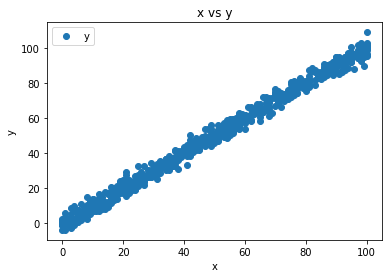

In [ ]:
# We then perform exploratory analysis (bivariate analysis) to understand more our dataset
# ---
# In our case here, we will only find if there is any relationships between the two variables.
# ---
# 
df.plot(x='x', y='y', style='o')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Observation
# ---
# Positive linear relation

##### Step 5. Implementation and Evaluation

In [ ]:
# Data Preparation
# ---
# We now divide our data into "attributes" and "labels".
# a) Attributes are the independent variables. 
# They will be stored in the X variable, specifying "-1" as the range for columns 
# since we want our attribute set to contain all the columns 
# except the last one which is "scores".
# 
# b) Labels are the dependent variables. 
# They will be contained in the y variable, specifying 1 for the label colum 
# since the index for "scores" column is 1.
# 
# * NB: Column indexes start with 0, 1 being the second, 2 being third etc.
# - Because We are predicting the percentage score depending on hours studied, 
# our attribute set will consist of "hours", while the lable will be "score"
# 
# * As we will get to see in another example, we can also specify the column names to 
# select our attributes and label 
# ---
# 
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
# Splitting the Dataset 
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# This means we will specify our parameter test_size below to have the value 0.2.
# ---
#

# Before we perform the split, we will import the train_test_split function
# which will help us perform this operation.
# ---
#
from sklearn.model_selection import train_test_split

# We then perform our split as shown.
# ---
# The test size of 0.2 indicates we’ve used 20% of the data for testing. 
# random_state ensures reproducibility, meaning that we will 
# get the same accuracy result everytime we run the code. 
# You can use any values for random_state but most common valus are 0 and 42.
# ---
# For the output of train_test_split, we get X_train, X_test, y_train, and y_test values.
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The outcome of running the above code is two datasets i.e. training dataset and test dataset. We will use the training dataset to train our machine learning algorithm and the test dataset evaluate the accuracy of our model.

In [ ]:
# Training the Algorithm
# ---
# In this step, we will be training our algorithm. 
# When we train an “algorithm” with data it will become a “model”.
# In simple terms, Model = Training (an Algorithm + Data).
# An algorithm is a set of rules to follow to solve a problem.
# ---
#

# First, we import our Linear regression algorithm.
# ---
#

# Then create an instance of the algorithm
# ---
#
regressor = LinearRegression()

# Then train the algorithm
# ---
#
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making Predictions
# ---
# After training our algorithm, we can now make some preditions
# ---   
# 

# We create the y_pred variable, which will contain the values 
# that will be created by our model for the input values in the X_test 
# ---
#
y_pred = regressor.predict(X_test)

ValueError: ignored

In [ ]:
# Next, we compare actual output values (original values) for X_test 
# with the predicted values by the model.
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted by Model': y_pred})
df

# We will note from the output that though our model is not very precise, 
# the predicted values can sometimes be close to the actual ones.

,Actual,Predicted by Model
0,29.667360,28.979528
1,56.687188,57.930708
2,85.027790,83.886939
3,73.138500,75.900406
4,48.437538,53.937442
...,...,...
135,14.002263,16.001413
136,94.151492,96.865054
137,40.831821,42.955960
138,19.471008,18.996362


In [ ]:
# Finally, we evaluate our model performance through some metric.
# ---  
# We will use the Root Mean Squared Error (RMSE) which is 
# the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.7479975801256606


We make the observation that our root mean square is 2.74. This value is close to 0 and most importantly, it is less than 10% the mean of y which was 49 as shown in the decriptive analysis report using the `describe()` method. This means our model was fairly accurate. 

In [ ]:
# Additionally, We will also use the coefficient of determination metric (R^2 Score)
# to also determine the accuracy of our model.
# ---
# The most common interpretation of the coefficient of determination 
# is how well the regression model fits the observed data. 
# For example, a coefficient of determination of 60% shows that 60% of the data 
# fit the regression model. Generally, a higher coefficient indicates a better fit for the model.
# ---
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
# ---
#  
print('R Squared:', metrics.r2_score(y_test, y_pred))

R Squared: 0.9916592070219102


In our case 

#### <font color="blue">Example 2: Multiple Linear Regression, KNN, Decision Trees and SVM</font>

##### <font color="blue">Example</font>

In [ ]:
# Example 2
# --- 
# Question: Create a multiple linear regression model to predict 
# the weight of fish given the following dataset.
# ---
# Dataset url = http://bit.ly/MRFishDataset
# ---
# YOUR CODE GOES BELOW
#

##### Step 1. Loading our Data 

In [ ]:
# Loading our dataset
#
fish_df = pd.read_csv('http://bit.ly/MRFishDataset')

##### Step 2. Checking the Data 

In [ ]:
# Previewing the dataset
# 
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Previewing the statistical summary of our dataset
# 
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 3. Cleaning Our Data

So far from what we've observed from in dataset, we don't need to perform any cleaning.

##### Step 4. Performing Exploratory Analysis

In [ ]:
# Performing Exploratory Analysis
# ---
# This time we will plot a correlation matrix, to determine the relationships between the different variables.
# This matrix will give us a sense of how well the variables are correlated. By this we mean, whether an
# increase or decrease in variable affects the other variable. 
# To break this down further, the matrix will provide us with values between -1 and 1. If the value between
# two variables is closer to 1 i.e. > 0.5, then it means the variables are strongly correlated, have a positive linear 
# relationship and it also means that as one value increases the other increases.
# On the other hand, of the value is less than -0.5, it would mean that the variables are strongly correlated but 
# have a negative linear relationship. 
# If the value is 0 or < -0.5 or < 0.5 it means that the variables don't have any relationship with each other.
# ---
# This type of visualisation can help us examine an assumption of linear regression; 
# relationship of predicor variables with the response variable. 
# ---
#
corrMatrix = fish_df.corr()
corrMatrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


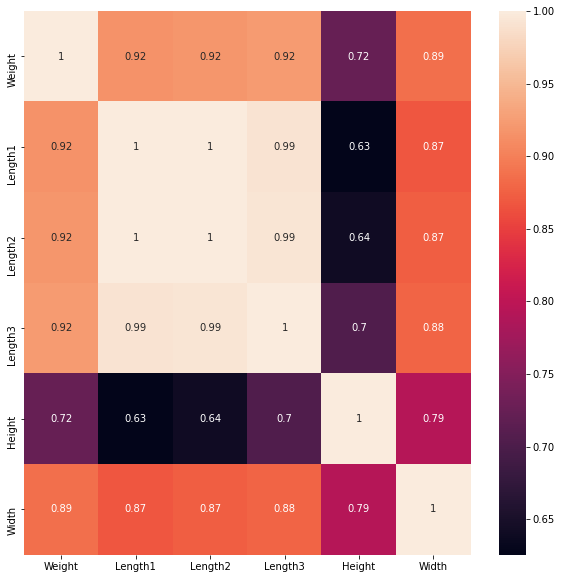

In [ ]:
# We can plot a visualisation of the matrix for better clarity
# --- 
# 
import seaborn as sns

# We define how big we want our visualisation
# 
plt.figure(figsize=(10, 10)) 

# Creating our visualisation
# 
sns.heatmap(corrMatrix, annot = True) 

##### Step 5. Implementation and Evaluation

 

In [ ]:
# We will now quickly prepare our dataset for modeling.
# ---
# We divide our data into predictor variables and response variable.  
# This time, we use column names.
# ---
# 
X = fish_df[['Length1', 'Length2', 'Length3',
       'Height', 'Width']]
y = fish_df['Weight']
y.head

<bound method NDFrame.head of 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64>

In [ ]:
# We then split our dataset
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# ---
#

# Firstly, importing our train_test_split function
# ---
#
from sklearn.model_selection import train_test_split

# Performing our split
# ---
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating our algorithms
# ---
#

# We first import our algorithms as shown below
# ---
#
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR

# Creating instances of our models
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor()
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
svr_regressor = SVR()

# Training our machine learning algorithms
linear_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
decision_tree_regressor.fit(X_train, y_train)
svr_regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Making Predictions  
# ---
#
linear_y_pred = linear_regressor.predict(X_test)
knn_pred = knn_regressor.predict(X_test)
decision_tree_pred = decision_tree_regressor.predict(X_test)
svr_pred = svr_regressor.predict(X_test) 

In [ ]:
# Next, we can compare actual output values for X_test with the predicted values
# This should also give us a sense of how our model performed during prediction
# ---
#
df = pd.DataFrame({
    'Actual': y_test, 
    'linear_y_prediction': linear_y_pred,
    'knn_prediction': knn_pred, 
    'decision_tree_prediction': decision_tree_pred,
    'svr_prediction': svr_pred})

df.sample(5)

,Actual,linear_y_prediction,knn_prediction,decision_tree_prediction,svr_prediction
125,1100.0,909.006222,931.0,1000.0,312.580310
101,218.0,351.834332,254.4,260.0,268.843826
31,955.0,788.646953,882.8,925.0,310.415243
135,510.0,688.578206,612.6,430.0,310.640773
15,600.0,585.018316,523.0,600.0,296.922576


In [ ]:
# Finally, we evaluate our model performance
# --- 
# The final step is to evaluate the performance of our models using the Root Mean Squared Error (RMSE). 
# This is the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Linear: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_y_pred)))
print('KNN: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print('Decision Tree: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, decision_tree_pred)))
print('SVR: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

# Observation for Linear Regression
# ---
# We can see that the value of root mean squared error is 161.33, 
# which is less than 10% of the mean value of the weight of 398. 
# This means that our algorithm fairly accurate and can make reasonably good predictions,
# though it did make quite a number of unreasonable predictions.
# There are many factors that may have contributed to the linear regressor inaccuracy, a few of which are:
# 1. Need more data: Having more data would mean being able to train our models more 
#    which would improve its the accuracy.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine whether that 
#    assumption is true. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.
# 4. Hyperparameter values: We could tune the algorithm's parameters in order to suit the dataset we have. 

# Let's make interpretations for other models...

Linear: Root Mean Squared Error: 129.4754308474807
KNN: Root Mean Squared Error: 73.84617567958412
Decision Tree: Root Mean Squared Error: 83.97439713984257
SVR: Root Mean Squared Error: 390.16826839383504


## <font color="green">Challenges </font>

#### <font color="green">Challenge 1</font>

In [61]:
# Challenge 1
# ---
# Create a regression model that predicts weight given the respective height.
# ---
# Dataset url = https://bit.ly/WeightHeightsDS
# ---
# This data set gives average masses for women as a function of their height
# in a sample of women of aged 30–39.
# ---
# YOUR CODE GOES BELOW
#

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

weihei = pd.read_csv('https://bit.ly/WeightHeightsDS')

#weihei.isnull().sum()
#weihei = weihei.dropna() 

from sklearn.linear_model import LinearRegression
Height= weihei.iloc[:, 1].values
Weight= weihei.iloc[:, :-1].values
'''
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
'''
weihei = weihei.dropna() 
weihei.isnull().sum()
weihei.head(20)


,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


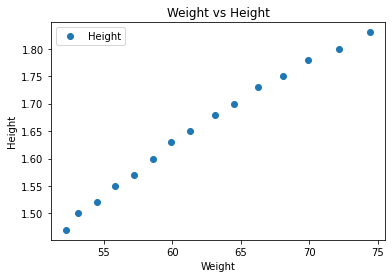

In [57]:
weihei.plot(x='Weight', y='Height', style='o')
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [58]:

from sklearn.model_selection import train_test_split

height_train, height_test, weight_train, weight_test = train_test_split(Height, Weight, test_size=0.2, random_state=0)


In [59]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(Weight, Height)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:

predictions = regressor.predict(Height)



ValueError: ignored

In [48]:
weihei = pd.DataFrame({'Actual': Height, 'Predicted by Model': predictions})

weihei

Exception: ignored

#### <font color="green">Challenge 2</font>

**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

**Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Problem Source [Kaggle](https://www.kaggle.com/hellbuoy/car-price-prediction)

In [ ]:
# Challenge 2
# ---
# Create a regression model to predict the price of cars given the following dataset.
# ---
# Dataset url = http://bit.ly/CarPriceDataset
# ---
# YOUR CODE GOES BELOW
#

#### <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Create a regression model to predict insurance costs.
# ---
# Dataset url = https://bit.ly/InsuranceDS
# ---
# YOUR CODE GOES BELOW
#

#### <font color="green">Challenge 4</font>

In [ ]:
# Challenge 4
# ---
# Create a regression model given the following dataset.
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# Hint: For ease of use of this dataset, drop the No. and date columns
# ---
# YOUR CODE GOES BELOW
#

#### <font color="green">Challenge 5</font>

Use the given dataset to predict the energy consumed by appliances in a home.

The dataset contains data collected at intervals of 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.  

**Glossary**
* date time year-month-day hour:minute:second
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in * Celsius RH2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH3, Humidity in laundry room area, in % T4, Temperature in office room, in * Celsius RH4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in * Celsius RH8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg * RHout, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1 
* rv2, Random variable 2 

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [ ]:
# Challenge 5
# ---
# Create a regression model to predict the energy consumed by appliances at home.
# ---
# Dataset url = https://bit.ly/EnergyDataset
# ---
# YOUR CODE GOES BELOW
#

# Additional Section: Model Diagnosics & Selection

## k-Fold Cross-Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the algorithm, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

You can read more about K-fold Cross-Validation here. [https://bit.ly/300REyX and https://bit.ly/2MzsMGF]

Let's figure out how to perform k-fold cross validation.

We will use this dataset. https://bit.ly/USAdmissionsDataset

We will first start by creating a multivariate model, and assessing it's accuracy.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#load the data
data = pd.read_csv('https://bit.ly/USAdmissionsDataset')

# We will use 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Running the code above should yield an RMSE of ~ 0.0756. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds for this example, and follow the documentation from [sklearn](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [ ]:
np.mean(RMSES)

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 3 instead. 

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size **n**, this is the same as using kfold to create **n** folds. 


In [ ]:
from sklearn.model_selection import LeaveOneOut

# Using 4 independent variables 
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = LeaveOneOut()

# if we have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# we create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting our regression model
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # making our predictins
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

In this scenario it is also helpful to plot out the RMSE values across all models:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

All in all, this indicates to us that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset. Note however that this can be an extremely time consuming process for large datasets.

#### <font color="green">Challenge 1a</font>

In [ ]:
# Challenge 1
# ---
# Revisit challenge 2a. above and use k-folds cross validation with 10 folds. 
# Assess your model. Was the performance good enough or are there alternative models.
# ---
# Dataset url = http://bit.ly/SLRSalaryDataset
# ---
# OUR CODE GOES BELOW
#

## Detecting Multicollinearity

First understanding how our independent variables are correlated to each other

In [ ]:
# importing our dataset
df = pd.read_csv('https://bit.ly/USAdmissionsDataset')

# Remove the serial and admit chance columns, we want to focus on our independent variables only.
features = df.drop(columns=['Serial No.', 'admit_chance'])

# calculating correlations
corr = features.corr()
corr

The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

In [ ]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. GRE has a score of 4.46, TOEFL has a score of 3.9, uni_rating a score of 2.62, etc.

CGPA has a value nearing 5, let's see how the VIF scores improve if we remove it from our dataset

In [ ]:
revised = df.drop(columns=['CGPA'])

corr = revised.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

All scores dropped, but the GRE's in particular did quite a bit, indicating that GRE and CGPA were colinear. 

## Residual Plots and Heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [ ]:
X = revised.values
y = df['admit_chance'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

Before we interpret the description above, let's recall what we are trying to predict: The percentage chance of admission to university. This means values between 0 and 1. 

Our min and max for the residual are fairly high: they suggest we've been up to 26% off target. It's important for us to plot this first: Is this a common occurence, or a few outliers?

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.17%

Let's show the residual plot

In [ ]:
plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')